In [1]:
# use spam.csv dataset from sms-spam-collection-dataset.zip
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

df = pd.read_csv('spam.csv', encoding='iso-8859-1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [2]:
# Drop the extra columns and rename columns

df = df.drop(labels = ["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis = 1)
df.rename(columns={'v1':'category', 'v2':'text'}, inplace=True)
df

,category,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [3]:
# 1. Create a word cloud to analyse the ham data
ham_list = df[df["category"] == "ham"]["text"].unique().tolist()
ham_list[:20]


['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
 'Ok lar... Joking wif u oni...',
 'U dun say so early hor... U c already then say...',
 "Nah I don't think he goes to usf, he lives around here though",
 'Even my brother is not like to speak with me. They treat me like aids patent.',
 "As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune",
 "I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.",
 "I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.",
 'I HAVE A DATE ON SUNDAY WITH WILL!!',
 "Oh k...i'm watching here:)",
 'Eh u remember how 2 spell his name... Yes i did. He v naughty make until i v wet.',
 'Fine if t

In [4]:
ham = " ".join(ham_list)
ham[:100]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got a'

In [5]:
from wordcloud import WordCloud
ham_wordcloud = WordCloud().generate(ham)

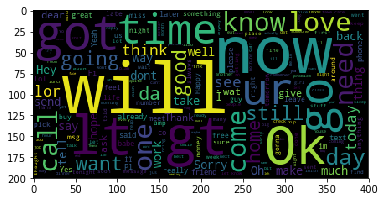

In [6]:
# show the created image of word cloud
plt.figure()
plt.imshow(ham_wordcloud)
plt.show()

In [7]:
# 2. create a custom bag of words
df['text'] = df['text'].str.lower().str.replace('[^a-z]', ' ').str.split()
df

,category,text
0,ham,"[go, until, jurong, point, crazy, available, o..."
1,ham,"[ok, lar, joking, wif, u, oni]"
2,spam,"[free, entry, in, a, wkly, comp, to, win, fa, ..."
3,ham,"[u, dun, say, so, early, hor, u, c, already, t..."
4,ham,"[nah, i, don, t, think, he, goes, to, usf, he,..."
5,spam,"[freemsg, hey, there, darling, it, s, been, we..."
6,ham,"[even, my, brother, is, not, like, to, speak, ..."
7,ham,"[as, per, your, request, melle, melle, oru, mi..."
8,spam,"[winner, as, a, valued, network, customer, you..."
9,spam,"[had, your, mobile, months, or, more, u, r, en..."


In [8]:
# 3. remove stop words from the bag of words
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')

ps = PorterStemmer()

df['text'] = df['text'].apply(lambda x: ' '.join([ps.stem(word) for word in x if word not in set(stopwords.words('english'))]))

df.head()

[nltk_data] Downloading package stopwords to C:\Users\SUPRATIK
[nltk_data]     SWAIN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,category,text
0,ham,go jurong point crazi avail bugi n great world...
1,ham,ok lar joke wif u oni
2,spam,free entri wkli comp win fa cup final tkt st m...
3,ham,u dun say earli hor u c alreadi say
4,ham,nah think goe usf live around though


In [9]:
# 3. using numpy create count vectors for the text data using bag of words
# import the vectorizer
from sklearn.feature_extraction.text import CountVectorizer

# create an instance
count_vect = CountVectorizer()
# fit the vectorizer with data
count_vect.fit(df.text)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [10]:
# convert text to vectors
X = count_vect.transform(df.text).toarray()
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [11]:
X.shape

(5572, 6221)

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

y = le.fit_transform(df.category)
y[:5]

array([0, 0, 1, 0, 0], dtype=int64)

In [13]:
# 4. fit the naive bayes model with above vectors and compare the accuracy with existing model
from sklearn.naive_bayes import MultinomialNB

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)


In [17]:
X_train.shape

(4457, 6221)

In [18]:
clf = MultinomialNB()

In [19]:
clf.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [20]:
predictions = clf.predict(X_test)
predictions.shape

(1115,)

In [21]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions)
accuracy

0.979372197309417